# efficient (not fine-tuning) model


Mounted at /content/drive
Found 1053 files belonging to 4 classes.
Using 843 files for training.
Found 1053 files belonging to 4 classes.
Using 210 files for validation.
Found 297 files belonging to 4 classes.
Bulunan sınıflar: ['Downdog', 'Plank', 'Squat DOWN', 'Squat UP']
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

--- Model Özeti ---


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 16, 16, 1280)   │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         5,124 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 5,124 (20.02 KB)

 Non-trainable params: 4,049,571 (15.45 MB)


--- Eğitim Başladı (20 Epoch) ---
Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 60s 307ms/step - accuracy: 0.5975 - loss: 0.9704 - val_accuracy: 0.9048 - val_loss: 0.3671
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 143ms/step - accuracy: 0.8952 - loss: 0.3642 - val_accuracy: 0.9286 - val_loss: 0.2388
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 143ms/step - accuracy: 0.9377 - loss: 0.2583 - val_accuracy: 0.9667 - val_loss: 0.1690
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 143ms/step - accuracy: 0.9632 - loss: 0.1853 - val_accuracy: 0.9810 - val_loss: 0.1352
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - accuracy: 0.9760 - loss: 0.1619 - val_accuracy: 0.9762 - val_loss: 0.1104
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - accuracy: 0.9765 - loss: 0.1391 - val_accuracy: 0.9714 - val_loss: 0.0967
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - accuracy: 0.9864 - loss: 0.1012 - val_accuracy: 0.9905 - val_loss: 0.0863
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - accuracy: 0.98

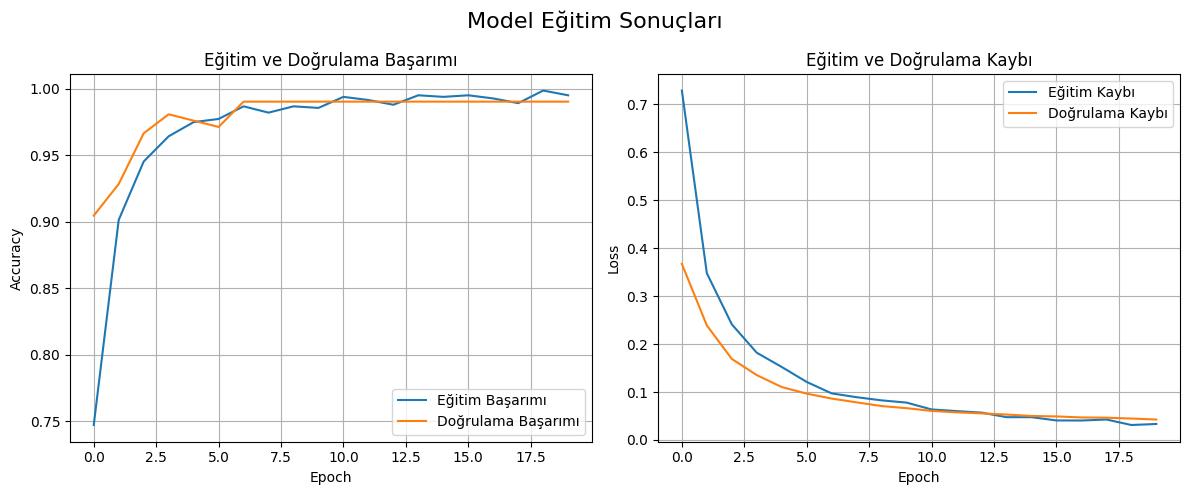

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications import EfficientNetB0

from google.colab import drive
drive.mount('/content/drive')

train_dir = "/content/drive/MyDrive/Colab Notebooks/Yapay zeka destekli Doğru egzersiz uygulaması/Dataset_1/Train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Yapay zeka destekli Doğru egzersiz uygulaması/Dataset_1/Test"

IMG_SIZE = (512, 512)
BATCH_SIZE = 16
EPOCHS = 20

train_dataset = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

validation_dataset = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

test_dataset = image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = train_dataset.class_names
NUM_CLASSES = len(class_names)
print(f"Bulunan sınıflar: {class_names}")

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# Model
data_augmentation = Sequential([
    RandomFlip('horizontal'),
    RandomRotation(0.1),
], name="data_augmentation")

inputs = Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = data_augmentation(inputs)
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
base_model.trainable = False

x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs, outputs)

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\n--- Model Özeti ---")
model.summary()

# learning
print(f"\n---({EPOCHS} Epoch) ---")
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=EPOCHS
)

print("\nModel test verisi üzerinde değerlendirme aşaması...")
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"\nTest loss: {test_loss:.4f}")
print(f"Test Accuary: {test_accuracy:.4f}")

# Grafik oluşturma
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Başarımı')
plt.plot(epochs_range, val_acc, label='Doğrulama Başarımı')
plt.legend(loc='lower right')
plt.title('Eğitim ve Doğrulama Başarımı')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı')
plt.plot(epochs_range, val_loss, label='Doğrulama Kaybı')
plt.legend(loc='upper right')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.suptitle('Model Eğitim Sonuçları', fontsize=16)
plt.tight_layout()
plt.show()


# Efficient Model 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1053 files belonging to 4 classes.
Using 843 files for training.
Found 1053 files belonging to 4 classes.
Using 210 files for validation.
Found 297 files belonging to 4 classes.
Bulunan sınıflar: ['Downdog', 'Plank', 'Squat DOWN', 'Squat UP']

--- Model Özeti ---


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 16, 16, 1280)   │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         5,124 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 5,124 (20.02 KB)

 Non-trainable params: 4,049,571 (15.45 MB)


---(20 Epoch) ---
Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 22s 198ms/step - accuracy: 0.5837 - loss: 1.0035 - val_accuracy: 0.9476 - val_loss: 0.3574
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - accuracy: 0.9156 - loss: 0.3745 - val_accuracy: 0.9286 - val_loss: 0.2245
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - accuracy: 0.9420 - loss: 0.2416 - val_accuracy: 0.9524 - val_loss: 0.1570
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - accuracy: 0.9591 - loss: 0.1807 - val_accuracy: 0.9810 - val_loss: 0.1244
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - accuracy: 0.9708 - loss: 0.1393 - val_accuracy: 0.9762 - val_loss: 0.1085
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - accuracy: 0.9774 - loss: 0.1167 - val_accuracy: 0.9857 - val_loss: 0.0888
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - accuracy: 0.9789 - loss: 0.1076 - val_accuracy: 0.9905 - val_loss: 0.0793
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - accuracy: 0.9841 - loss: 0.089

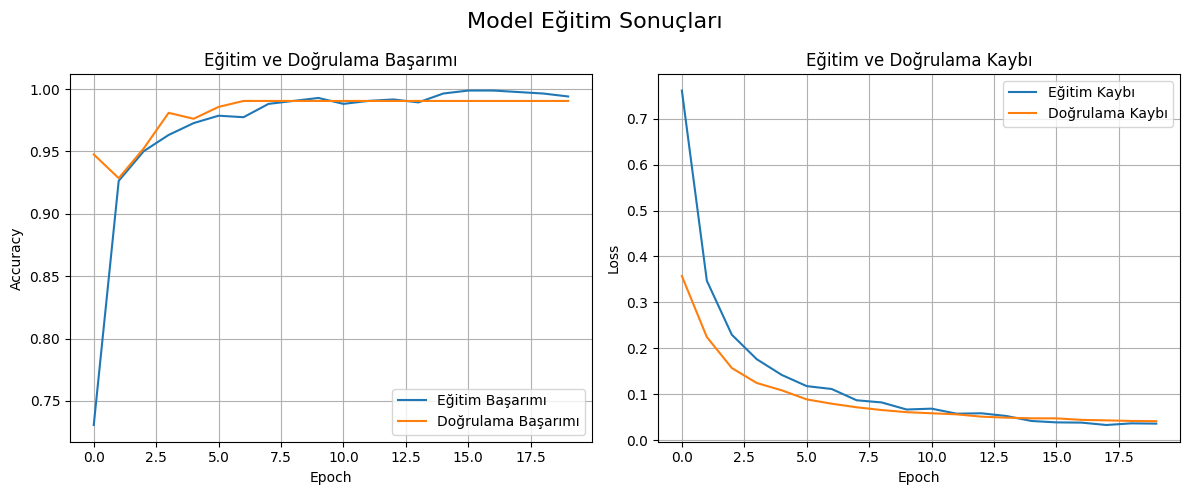

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications import EfficientNetB0

from google.colab import drive
drive.mount('/content/drive')

train_dir = "/content/drive/MyDrive/Colab Notebooks/Yapay zeka destekli Doğru egzersiz uygulaması/Dataset_1/Train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Yapay zeka destekli Doğru egzersiz uygulaması/Dataset_1/Test"

IMG_SIZE = (512, 512)
BATCH_SIZE = 16
EPOCHS = 20

train_dataset = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

validation_dataset = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

test_dataset = image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = train_dataset.class_names
NUM_CLASSES = len(class_names)
print(f"Bulunan sınıflar: {class_names}")

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# Model
data_augmentation = Sequential([
    RandomFlip('horizontal'),
    RandomRotation(0.1),
], name="data_augmentation")

inputs = Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = data_augmentation(inputs)
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
base_model.trainable = False

x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs, outputs)

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\n--- Model Özeti ---")
model.summary()

# learning
print(f"\n---({EPOCHS} Epoch) ---")
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=EPOCHS
)

print("\nModel test verisi üzerinde değerlendirme aşaması...")
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"\nTest loss: {test_loss:.4f}")
print(f"Test Accuary: {test_accuracy:.4f}")

# Grafik oluşturma
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Başarımı')
plt.plot(epochs_range, val_acc, label='Doğrulama Başarımı')
plt.legend(loc='lower right')
plt.title('Eğitim ve Doğrulama Başarımı')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı')
plt.plot(epochs_range, val_loss, label='Doğrulama Kaybı')
plt.legend(loc='upper right')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.suptitle('Model Eğitim Sonuçları', fontsize=16)
plt.tight_layout()
plt.show()
